# Library

In [1]:
import pandas as pd
import numpy as np
import PreProcessingText as ppt
from collections import Counter, defaultdict
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx
import matplotlib.pyplot as plt
import squarify
from transformers import pipeline
from tqdm import tqdm

c:\Users\dommy\miniconda3\envs\gestione\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dommy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dommy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dommy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Read csv

In [25]:
df = pd.read_csv('merged_data.csv')
print(df.shape)
df.head()

(292783, 12)


,name_board,creator_thread,creator_id_thread,name_thread,created_on,registration_date,total_posts,reputation,creator_post,creator_id_post,content,created_on_post
0,Tor,blonger,32544,"Tor shrinked of about 13,5% but you can contri...",2020-01-09,1900-01-01 00:00:00,0.0,0.0,[deleted],37,[removed],2019-10-16
1,Tor,blonger,32544,"Tor shrinked of about 13,5% but you can contri...",2020-01-09,1900-01-01 00:00:00,0.0,0.0,blonger,32544,The Torproject recently ***LINK***announced[ht...,2019-10-30
2,Tor,Xanitforthecash,2467,should I run a tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,rswz,32661,***LINK***http://ea5faa5po25cf7fb.onion/projec...,2019-10-16
3,Tor,Xanitforthecash,2467,should I run a tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,ChemistWeb,33150,if someone will do something bad from that ip ...,2019-10-16
4,Tor,Xanitforthecash,2467,should I run a tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,Xanitforthecash,2467,I already leave tor open for a good amount of ...,2019-10-16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292783 entries, 0 to 292782
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name_board         292783 non-null  object 
 1   creator_thread     291854 non-null  object 
 2   creator_id_thread  292783 non-null  int64  
 3   name_thread        292783 non-null  object 
 4   created_on         292783 non-null  object 
 5   registration_date  283901 non-null  object 
 6   total_posts        283901 non-null  float64
 7   reputation         283901 non-null  float64
 8   creator_post       292783 non-null  object 
 9   creator_id_post    292783 non-null  int64  
 10  content            292783 non-null  object 
 11  created_on_post    292783 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 26.8+ MB


In [4]:
df.describe()

,creator_id_thread,total_posts,reputation,creator_id_post
count,292783.000000,283901.000000,283901.000000,292783.000000
mean,10955.409143,256.476825,110.806869,13859.933620
std,11966.111899,985.677180,520.127893,13231.876301
min,-1.000000,0.000000,-1313.000000,1.000000
25%,1759.000000,4.000000,0.000000,2370.000000
50%,6686.000000,25.000000,3.000000,9080.000000
75%,15491.000000,118.000000,23.000000,22793.000000
max,47346.000000,10406.000000,4790.000000,47532.000000


In [5]:
df.describe(include='object')

,name_board,creator_thread,name_thread,created_on,registration_date,creator_post,content,created_on_post
count,292783,291854,292783,292783,283901,292783,292783,292783
unique,382,23805,68931,25,577,42682,270239,629
top,DarkNetMarkets,[deleted],#FREE GIVE AWAY: 1000X XTC PILLS worth 950 EUR...,2020-01-08,1900-01-01 00:00:00,[deleted],[removed],2019-08-08
freq,49716,3919,342,101604,40879,4499,13198,26736


In [6]:
df.isnull().sum()

name_board              0
creator_thread        929
creator_id_thread       0
name_thread             0
created_on              0
registration_date    8882
total_posts          8882
reputation           8882
creator_post            0
creator_id_post         0
content                 0
created_on_post         0
dtype: int64

# Analyze name_thread

In [7]:
df['name_thread'].value_counts()

name_thread
#FREE GIVE AWAY: 1000X XTC PILLS worth 950 EURO GUESS NUMBER BITWEEN 1 AND 500                         342
Obtain Vendor Badge                                                                                    291
Giving away free 125g Gorilla Glue worth 725-1400 euros (IMPORTANT UPDATE!)                            270
COCAINE GIVE AWAY WE ARE GIVING AWAY 30G COLOMBIAN COCAINE COMMENT TO ENTER! ENDS 16/09/2019 1PM by    223
GIVEAWAY - 14G MORROCCAN HASHISH                                                                       222
                                                                                                      ... 
/d/ketamine is now live!                                                                                 1
Is there a way to view cancelled or refunded or orders after dispute?                                    1
AXS MARKET                                                                                               1
[ROLEX]Buy and get 50% mo

In [3]:
# 15 Minutes
df['name_thread'] = df['name_thread'].apply(ppt.clean_sentences)
df['name_thread'].value_counts()

name_thread
FREE give away XTC PILLS worth EURO guess number bitween and                          342
Obtain Vendor Badge                                                                   291
giveaway of Dark Star worth                                                           272
giving away free Gorilla Glue worth euros IMPORTANT update                            270
COCAINE GIVE away we are giving away COLOMBIAN COCAINE COMMENT to enter ends pm by    223
                                                                                     ... 
Benzobananas for mg etizolam liquid QUICK UPDATE on reviews and other news              1
Bitcoin prices went up come and shop at Greenmask                                       1
is there any way to hide specific listings                                              1
se en now the vendor have Dispute on for month now is on vacation status                1
Moroccan Hash Store                                                                     

In [4]:
# Convert numpy array to pandas DataFrame
df_unique = pd.DataFrame(df['name_thread'].unique())

# Save DataFrame to CSV
df_unique.to_csv('preproc_data_name_thread.txt', index=False, header=False)

In [5]:
# 6 Minutes
df['name_thread'] = df['name_thread'].apply(ppt.preprocess_title)
df['name_thread'] = df['name_thread'].apply(ppt.remove_single_characters)
df['name_thread'].value_counts()

name_thread
FREE give away XTC PILLS worth EURO guess number bitween       342
                                                               337
Obtain Vendor Badge                                            291
giveaway Dark Star worth                                       272
giving away free Gorilla Glue worth euro IMPORTANT update      270
                                                              ... 
Venmo Method crosspost                                           1
id dl info                                                       1
Vendor OrganicValley theorganicvalley important information      1
COCAINE MDA XTC ICE PILLS MORPHINE HYDROMORPH OXYCODONE          1
Vendor review neverpressedrx crosspost                           1
Name: count, Length: 66736, dtype: int64

In [6]:
df.to_csv('cleaned_data_name_thread.csv', index=False)
# Convert numpy array to pandas DataFrame
df_unique = pd.DataFrame(df['name_thread'].unique())

# Save DataFrame to CSV
df_unique.to_csv('name_thread.txt', index=False, header=False)

## Plot Most-frequent Word

In [29]:
df = pd.read_csv('cleaned_data_name_thread.csv')
word_dict = Counter(' '.join([str(item).lower() for item in df.name_thread.tolist()]).split())
df.head()

,name_board,creator_thread,creator_id_thread,name_thread,created_on,registration_date,total_posts,reputation,creator_post,creator_id_post,content,created_on_post
0,Tor,blonger,32544,Tor shrinked contribute,2020-01-09,1900-01-01 00:00:00,0.0,0.0,[deleted],37,[removed],2019-10-16
1,Tor,blonger,32544,Tor shrinked contribute,2020-01-09,1900-01-01 00:00:00,0.0,0.0,blonger,32544,The Torproject recently ***LINK***announced[ht...,2019-10-30
2,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,rswz,32661,***LINK***http://ea5faa5po25cf7fb.onion/projec...,2019-10-16
3,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,ChemistWeb,33150,if someone will do something bad from that ip ...,2019-10-16
4,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,Xanitforthecash,2467,I already leave tor open for a good amount of ...,2019-10-16


### WordCloud

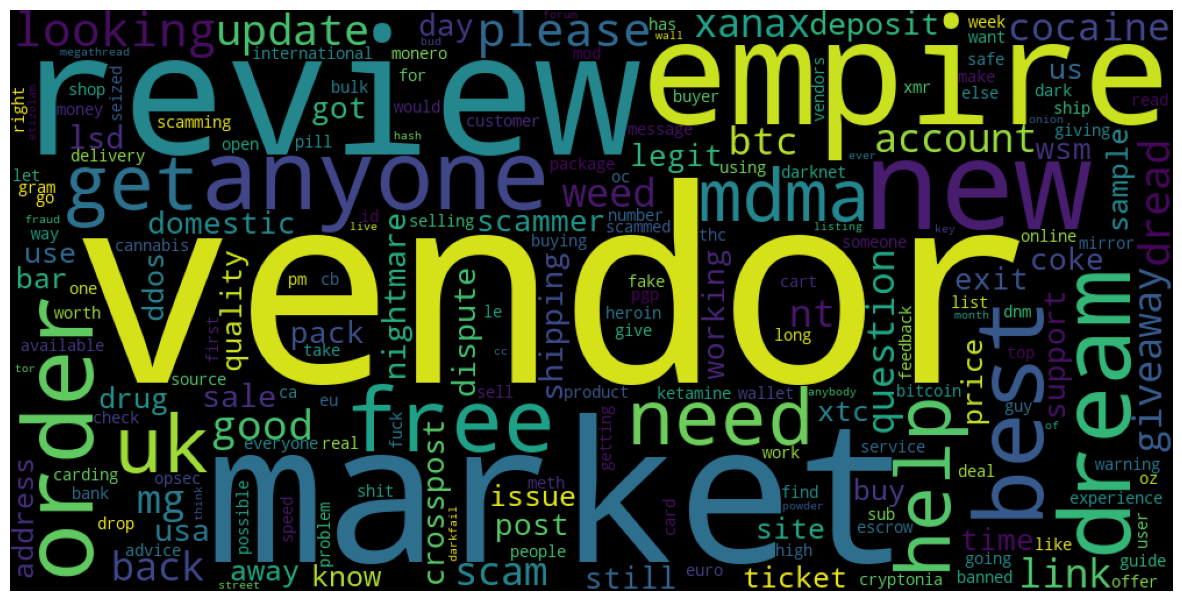

In [11]:
# Count of words in each name_thread
most_common_words = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_dict)
plt.figure(figsize=(15,8))
plt.imshow(most_common_words)
plt.axis("off");

### Barplot & PieChart

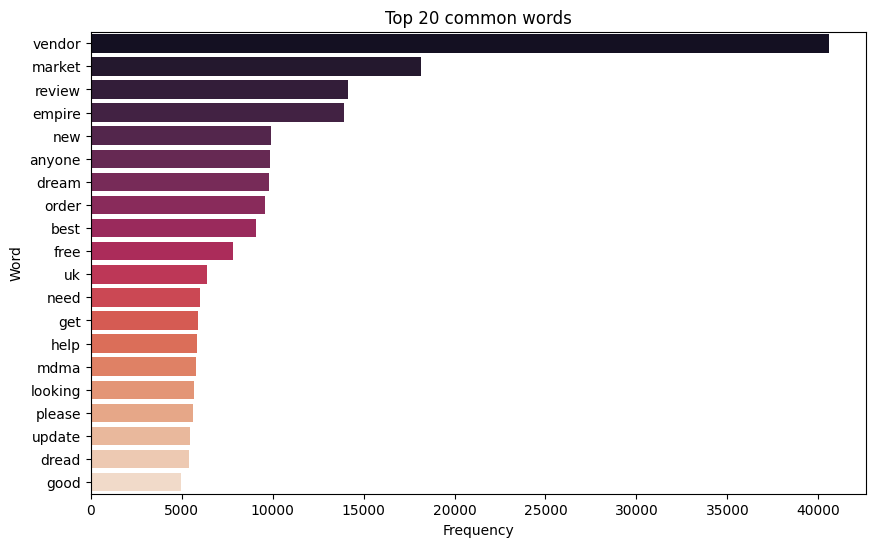

In [3]:
# Most 20 common words
word_freq = word_dict.most_common(20)
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, hue='Word', dodge=False, palette='rocket', legend=False)
plt.title('Top 20 common words');

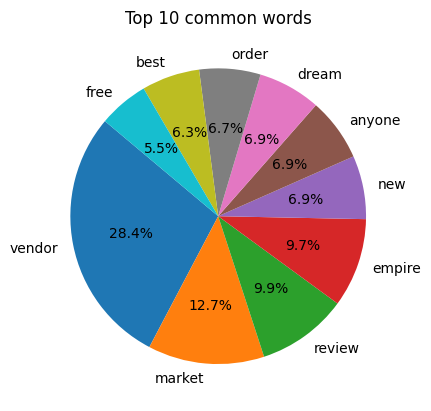

In [4]:
plt.pie(word_freq_df['Frequency'][:10], labels=word_freq_df['Word'][:10], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 common words');

C:\Users\dommy\AppData\Local\Temp\ipykernel_4348\1552728134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')


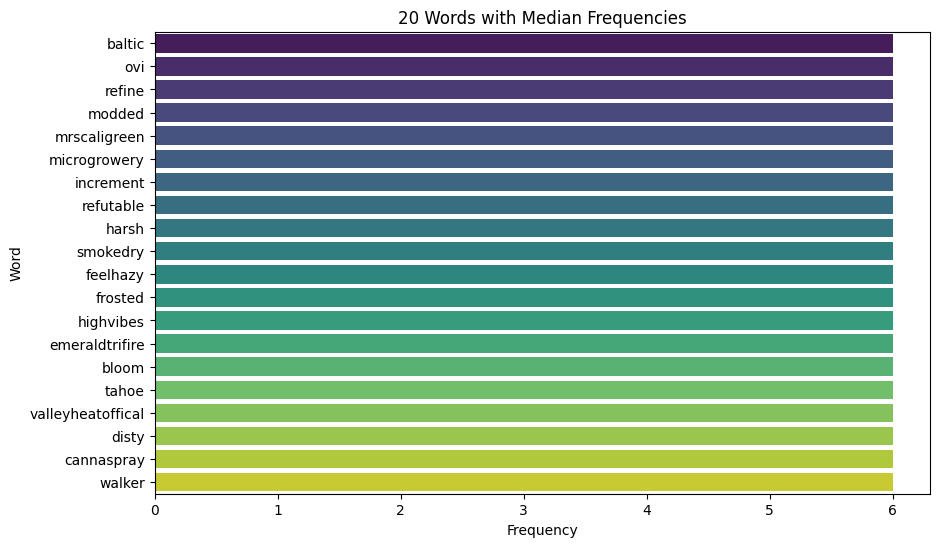

In [20]:
sorted_word_freq = word_dict.most_common()
total_words = len(sorted_word_freq)
middle_index = total_words // 2
middle_words = sorted_word_freq[middle_index - 10:middle_index + 10]
word_freq_df = pd.DataFrame(middle_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.title('20 Words with Median Frequencies');

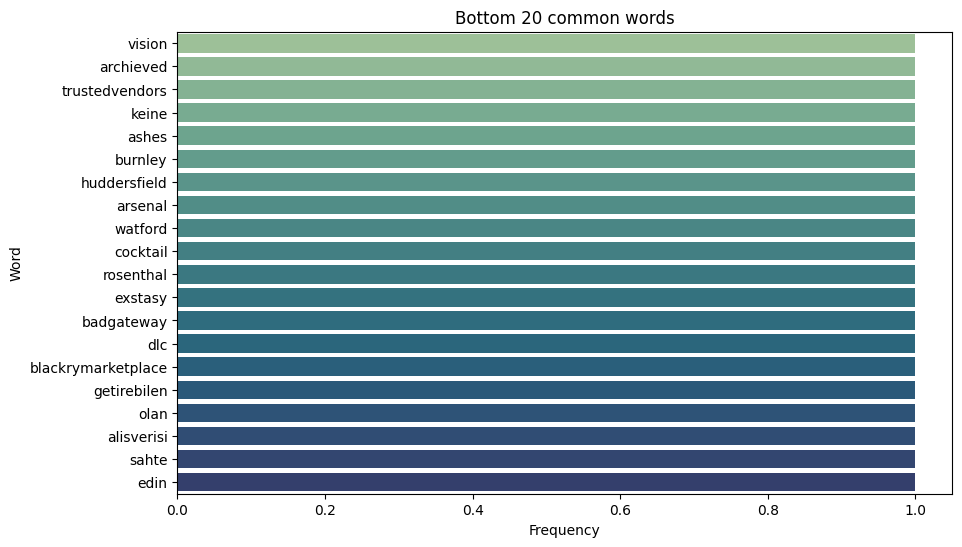

In [22]:
# Bottom 20 common words
word_freq = word_dict.most_common()[:-21:-1]
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, hue='Word', dodge=False, palette='crest', legend=False)
plt.title('Bottom 20 common words');

### Distribution of Words

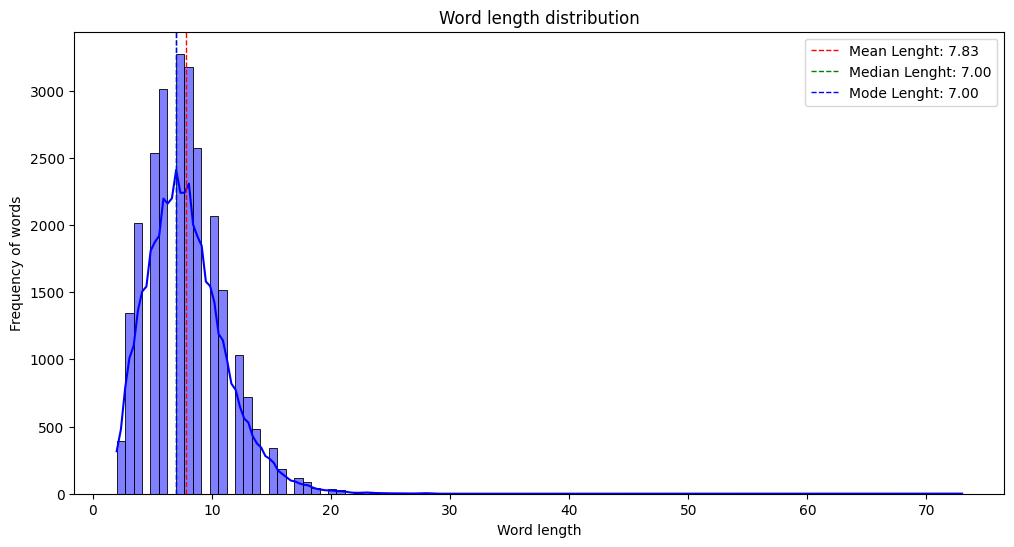

In [16]:
word_lengths = [len(word) for word in word_dict.keys()]
mean_length = np.mean(word_lengths)
median_length = np.median(word_lengths)
mode_length = np.argmax(np.bincount(word_lengths))
plt.figure(figsize=(12, 6))
sns.histplot(word_lengths, bins=100, kde=True, color='blue')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label=f'Mean Lenght: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=1, label=f'Median Lenght: {median_length:.2f}')
plt.axvline(mode_length, color='blue', linestyle='dashed', linewidth=1, label=f'Mode Lenght: {mode_length:.2f}')
plt.title('Word length distribution')
plt.xlabel('Word length')
plt.ylabel('Frequency of words')
plt.legend();

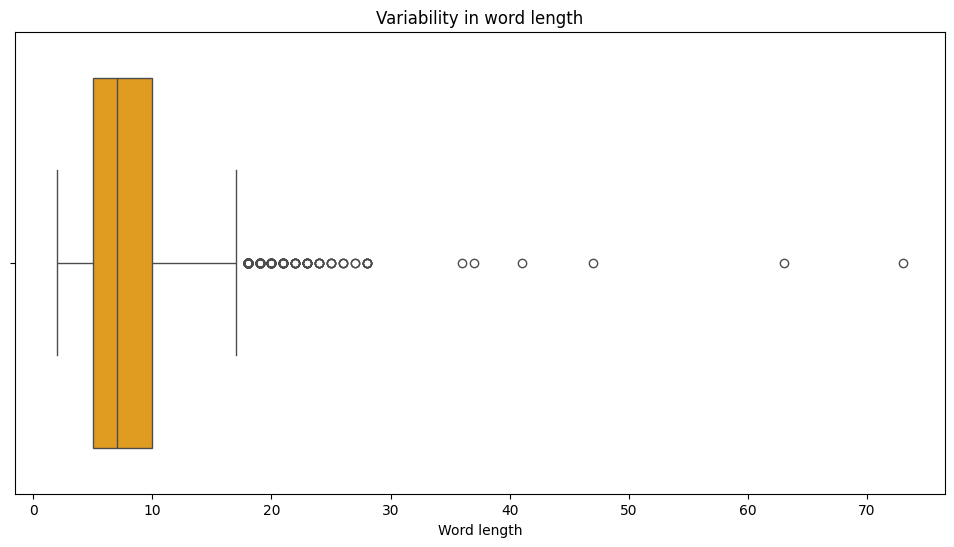

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=word_lengths, color='orange')
plt.title('Variability in word length')
plt.xlabel('Word length');

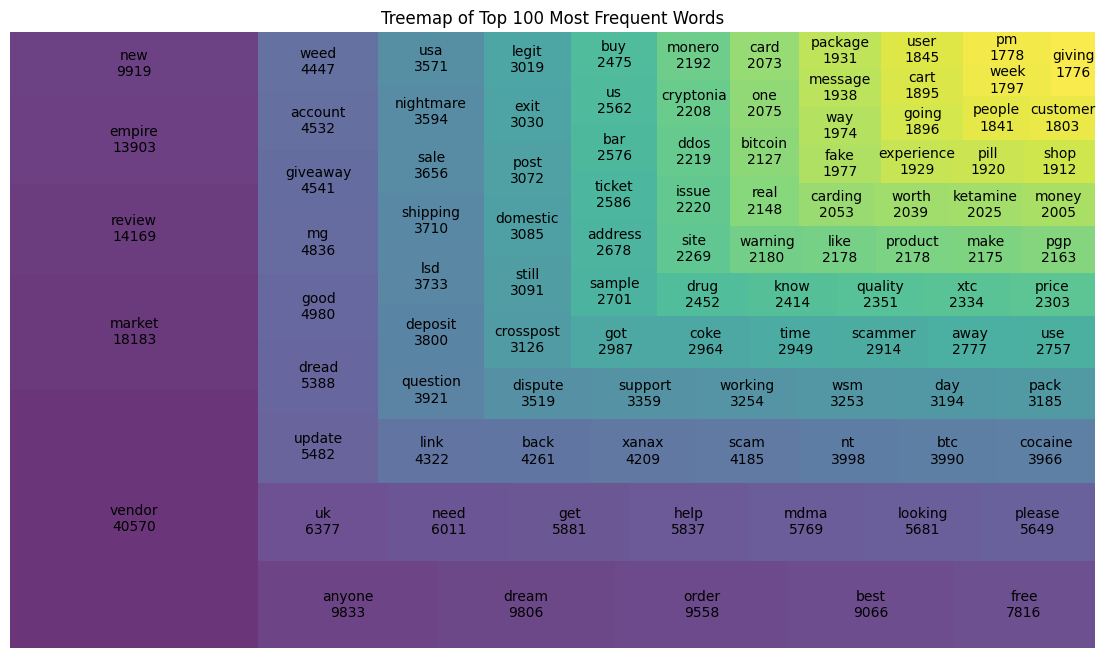

In [10]:
most_common_words = word_dict.most_common(100)
words, frequencies = zip(*most_common_words)
sizes = [freq for freq in frequencies]
labels = [f'{word}\n{freq}' for word, freq in most_common_words]

plt.figure(figsize=(14, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette('viridis', len(sizes)))
plt.axis('off')
plt.title('Treemap of Top 100 Most Frequent Words');

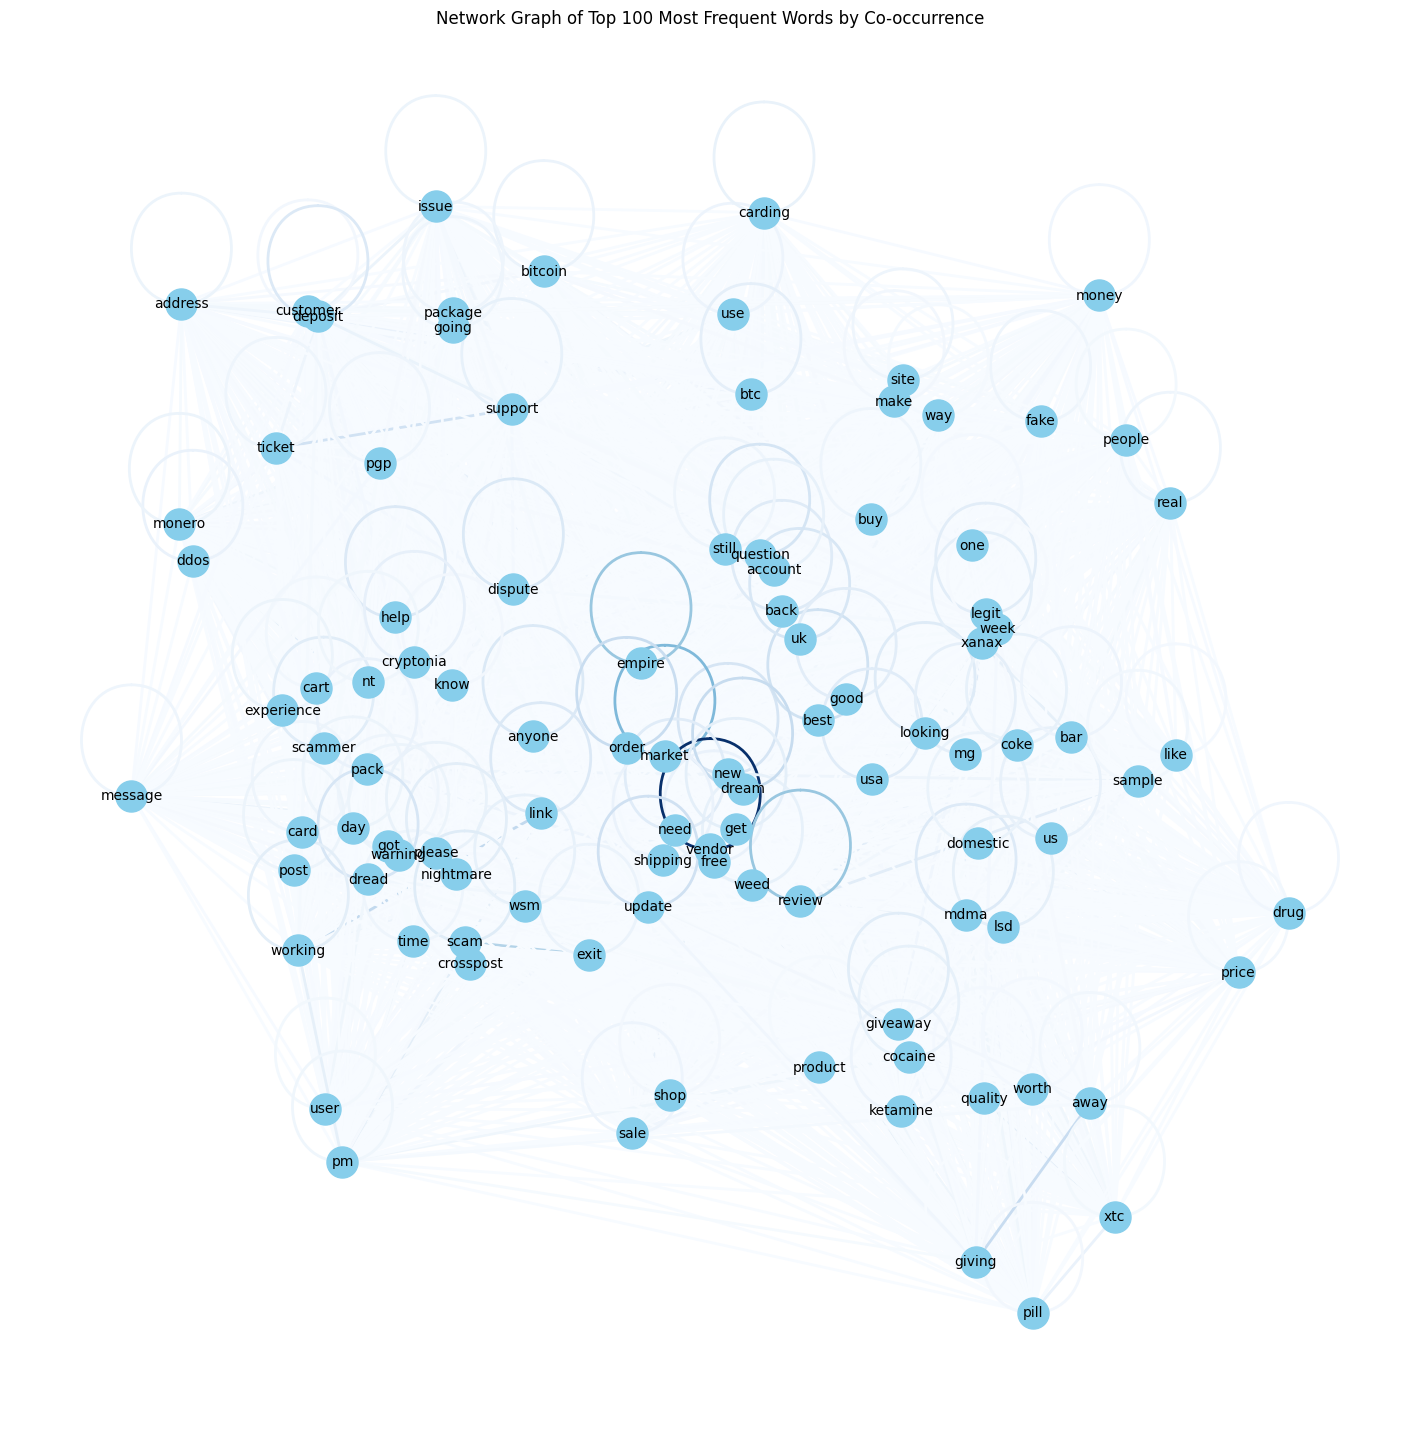

In [13]:
top_words = set(words)

# Calculate co-occurrences
window_size = 5
co_occurrence = defaultdict(int)

# Tokenize the text
text = ' '.join([str(item).lower() for item in df.name_thread.tolist()])
tokens = text.split()

# Sliding window to count co-occurrences
for i in range(len(tokens) - window_size + 1):
    window = tokens[i:i + window_size]
    for i, word1 in enumerate(window):
        if word1 in top_words:
            for j, word2 in enumerate(window):
                if i != j and word2 in top_words:
                    pair = tuple(sorted([word1, word2]))
                    co_occurrence[pair] += 1

# Create the graph
G = nx.Graph()

# Add edges based on co-occurrence
for (word1, word2), count in co_occurrence.items():
    if count > 1:  # Include only pairs with more than 1 co-occurrence
        G.add_edge(word1, word2, weight=count)

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.15, iterations=20)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues, font_size=10)
plt.title('Network Graph of Top 100 Most Frequent Words by Co-occurrence');

# Modeling Thread Feature

## 1° Approach: Zero-shot Classification (Too Time)

In [3]:
df = pd.read_csv('cleaned_data_name_thread.csv')
df_intent = pd.read_csv('../../intent_crime.csv')
list_intents = df_intent['intent'].to_list()
pipe = pipeline("zero-shot-classification", model='cross-encoder/nli-roberta-base')
df = df.dropna(subset=['name_thread'])

df = ppt.zero_shot_process_threads(df[:30000], pipe, list_intents, 'output_file.csv')

c:\Users\dommy\OneDrive\Documenti\GSoC - Final\GSoC\Analyze_files\Completed\PreProcessingText.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'top_label_{i}'] = None
c:\Users\dommy\OneDrive\Documenti\GSoC - Final\GSoC\Analyze_files\Completed\PreProcessingText.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'top_score_{i}'] = None
c:\Users\dommy\OneDrive\Documenti\GSoC - Final\GSoC\Analyze_files\Completed\PreProcessingText.py:148: SettingWithCopyWarning: 
A value is trying to be set on a 

In [2]:
dd = pd.read_csv('output_file.csv')
dd['top_label_1'].value_counts()

top_label_1
tor problems         6542
drugs                6362
find vendor          4713
fraud                2984
update site          1371
sell drugs           1209
no crime             1161
stolen goods         1021
hacking               733
counterfeit money     709
corruption            533
check sale            402
espionage             391
trafficking           354
burglary              243
buy drugs             194
gun                   163
order medication      159
fake IDs              140
murder                 86
identity theft         85
government attack      80
genocide               79
bombing                74
pedophilia             53
abduction              33
rape                   30
arson                  29
buy weapons            28
kidnapping             22
child abuse            10
organ trafficking       5
terrorism               2
Name: count, dtype: int64

In [7]:
dd.drop_duplicates(subset=['name_thread'], keep='first', inplace=True)
dd[['name_thread', 'top_label_1', 'top_score_1', 'top_label_2', 'top_score_2']].head(50)

,name_thread,top_label_1,top_score_1,top_label_2,top_score_2
0,Tor shrinked contribute,tor problems,0.284519,fraud,0.073563
2,run tor node,arson,0.120247,hacking,0.071540
7,Tor browser,hacking,0.166554,fraud,0.110060
9,UPDATED tor security guide crosspost,update site,0.408131,arson,0.048836
10,CostcoRotisserieChicken spreading FUD Let Smas...,corruption,0.208999,fraud,0.130308
11,got banned darknetmarkets simply trying help c...,tor problems,0.211538,hacking,0.157267
12,hiring Shadow Simulation Developer,tor problems,0.111187,hacking,0.092769
13,New release tor browser,update site,0.086229,fraud,0.071933
14,Onion Service operator mitigate DDoS Attacks a...,tor problems,0.150861,hacking,0.131263
17,noscript defaulting ALL Options Enabled NOT sa...,tor problems,0.155056,find vendor,0.056707


## TF-IDF - Not Accuracy

In [ ]:
df = pd.read_csv('cleaned_data_name_thread.csv')
df = df.dropna(subset=['name_thread'])
df = ppt.extract_top_keywords_tfidf(df)
df.to_csv('cleaned_data_name_thread_TF-IDF_top_keywords.csv', index=False)

In [10]:
df_tf_idf = pd.read_csv('cleaned_data_name_thread_TF-IDF_top_keywords.csv')
df_tf_idf.drop_duplicates(subset=['name_thread'], keep='first', inplace=True)
df_tf_idf[['name_thread', 'top_keyword_1', 'top_keyword_2', 'top_keyword_3']].head(50)

,name_thread,top_keyword_1,top_keyword_2,top_keyword_3
0,Tor shrinked contribute,shrinked,contribute,tor
2,run tor node,node,run,tor
7,Tor browser,browser,tor,zzzzz
9,UPDATED tor security guide crosspost,updated,security,tor
10,CostcoRotisserieChicken spreading FUD Let Smas...,costcorotisseriechicken,bugs,smash
11,got banned darknetmarkets simply trying help c...,simply,darknetmarkets,trying
12,hiring Shadow Simulation Developer,simulation,shadow,hiring
13,New release tor browser,release,browser,tor
14,Onion Service operator mitigate DDoS Attacks a...,operator,mitigate,attacks
17,noscript defaulting ALL Options Enabled NOT sa...,wild,vulnerability,release


## Clustering + SentenceBert

<img src="../../Graph.png" width="800" height="800">

In [2]:
df = pd.read_csv('cleaned_data_name_thread.csv')
df = df.dropna(subset=['name_thread'])
df = df.drop_duplicates(subset=['name_thread'], keep='first')
df.shape[0]

66735

2024-06-18 11:58:22,387 - PreProcessingText - INFO - Encoding the corpus. This might take a while.
Batches: 100%|██████████| 157/157 [01:54<00:00,  1.37it/s]
2024-06-18 12:00:16,978 - PreProcessingText - INFO - Starting clustering with Agglomerative Clustering


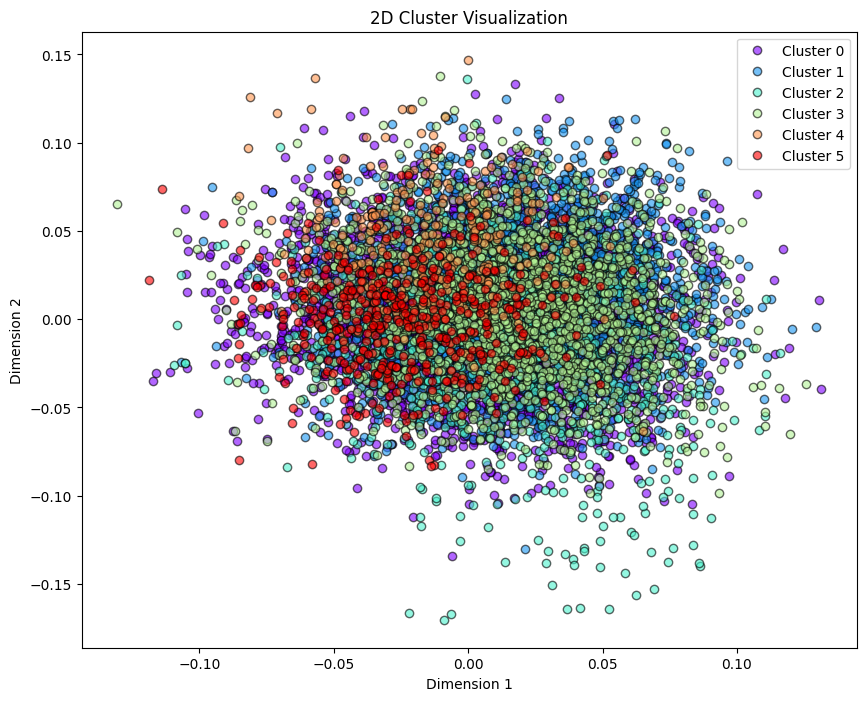

2024-06-18 12:00:33,746 - PreProcessingText - INFO - Extracting keywords from final clusters
2024-06-18 12:00:33,762 - PreProcessingText - INFO - 
Cluster 0, #3673 Elements


--------------------
[('tor', 0.3025), ('torum', 0.2811), ('browser', 0.2128), ('darkweb', 0.2122), ('hacker', 0.2092)]


In [3]:
tc = ppt.TextClustering(df[:10000], 'name_thread')
summarized_clusters, cluster_df = tc.main(name_model='distiluse-base-multilingual-cased-v1', batch_size=64, n_clusters=6, n_words=10, exec_reduction=False)

In [ ]:
cluster_df.to_csv("clusyer_df.csv", index=False)
summarized_clusters.to_csv("summarized_clusters.csv", index=False)

,name_board,creator_thread,creator_id_thread,name_thread,created_on,registration_date,total_posts,reputation,creator_post,creator_id_post,content,created_on_post,cluster
0,Tor,blonger,32544,Tor shrinked contribute,2020-01-09,1900-01-01 00:00:00,0.0,0.0,[deleted],37,[removed],2019-10-16,0
1,Tor,blonger,32544,Tor shrinked contribute,2020-01-09,1900-01-01 00:00:00,0.0,0.0,blonger,32544,The Torproject recently ***LINK***announced[ht...,2019-10-30,0
2,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,rswz,32661,***LINK***http://ea5faa5po25cf7fb.onion/projec...,2019-10-16,0
3,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,ChemistWeb,33150,if someone will do something bad from that ip ...,2019-10-16,-1
4,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,Xanitforthecash,2467,I already leave tor open for a good amount of ...,2019-10-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,DNMSourcing,stonedrocker422,4989,fuck Houseofacid,2019-08-06,2019-05-21 00:00:00,13.0,3.0,Fake_Doors,2173,"If I had a house of acid, I would be...home.",2019-05-25,0
998,DNMSourcing,stonedrocker422,4989,fuck Houseofacid,2019-08-06,2019-05-21 00:00:00,13.0,3.0,foolsbard,8795,"Not since dream, if anyone else knows I'd love...",2019-05-25,0
999,DNMSourcing,stonedrocker422,4989,fuck Houseofacid,2019-08-06,2019-05-21 00:00:00,13.0,3.0,stonedrocker422,4989,anyone see him on any market?,2019-08-06,0
1000,DNMSourcing,[deleted],37,suggestion domestic MDMA ket vendor,2019-08-06,1900-01-01 00:00:00,0.0,0.0,Stonecoldheathr,2842,I had good luck with Gladyman on a small order...,2019-05-25,1
